In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from stepwise_regression import step_reg

In [2]:
# lendo a base de dados
dados = pd.read_excel('dados.xlsx')

In [3]:
dados.head()

,hora_primeira_mobilizacao,distancia_tc6,tempo_iot,uti_horas,permanencia_total_dias,permanecia_total_horas,cec,anoxia
0,10.50,254,3.83,26.33,3.54,85.00,90,70
1,13.45,198,5.58,45.50,5.47,131.50,55,38
2,11.50,210,5.58,71.50,5.66,133.66,130,122
3,16.67,361,2.00,54.16,5.50,132.00,0,0
4,10.27,491,8.00,46.83,4.50,108.00,40,24


In [4]:
# deixando somente as variáveis que serão utilizadas para análise
dados2 = dados[['hora_primeira_mobilizacao', 'tempo_iot', 'uti_horas', 'cec']]

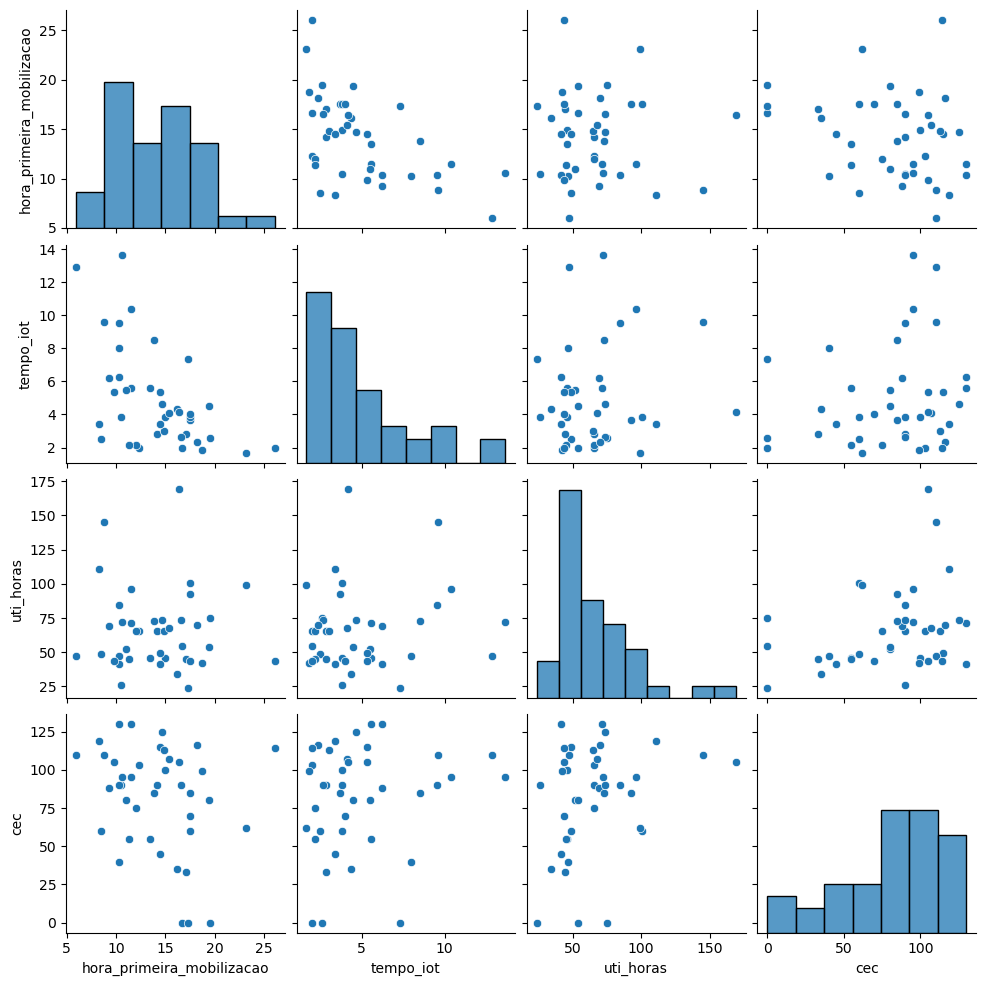

In [5]:
# gráfico mostrando a relação par a par das variáveis
sns.pairplot(dados2)

In [6]:
# teste de normalidade nas variáveis, para decidir entre pearson e spearman para ver a correlação
stats.shapiro(dados2.hora_primeira_mobilizacao)

ShapiroResult(statistic=0.9693280458450317, pvalue=0.32778942584991455)

In [7]:
stats.shapiro(dados2.tempo_iot)

ShapiroResult(statistic=0.8545597195625305, pvalue=9.716281783767045e-05)

In [8]:
stats.shapiro(dados2.uti_horas)

ShapiroResult(statistic=0.8621699810028076, pvalue=0.00015133057604543865)

In [9]:
stats.shapiro(dados2.cec)

ShapiroResult(statistic=0.9173321723937988, pvalue=0.005612083710730076)

In [10]:
# teste de spearman para ver a correlação entre as variáveis
correlacoes = dados2.corr(method='spearman')
correlacoes

,hora_primeira_mobilizacao,tempo_iot,uti_horas,cec
hora_primeira_mobilizacao,1.000000,-0.518527,-0.003834,-0.245955
tempo_iot,-0.518527,1.000000,0.071777,0.172781
uti_horas,-0.003834,0.071777,1.000000,0.245847
cec,-0.245955,0.172781,0.245847,1.000000


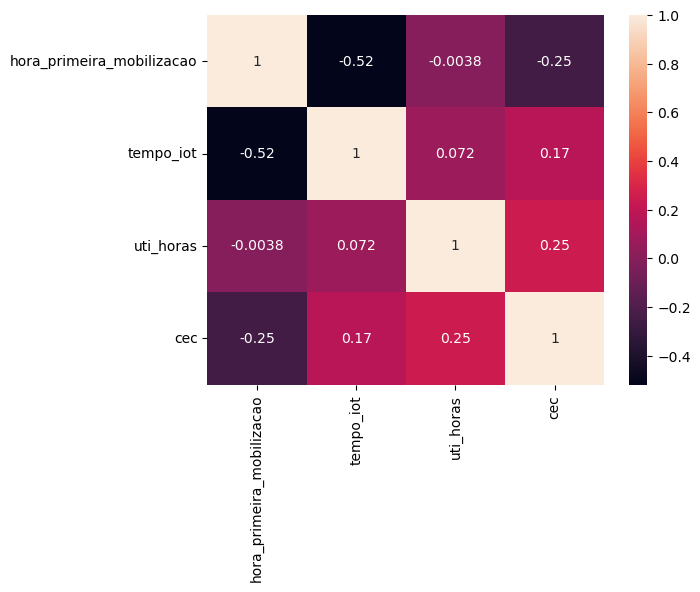

In [11]:
# visualização das correlações em mapa de calor
plt.figure()
sns.heatmap(correlacoes, annot=True);

In [12]:
# Dados descritivos do banco de dados
dados2.describe()

,hora_primeira_mobilizacao,tempo_iot,uti_horas,cec
count,41.000000,41.000000,41.000000,41.000000
mean,14.157805,4.876341,65.273659,81.926829
std,4.210075,2.979501,29.445698,34.623251
min,5.950000,1.660000,23.830000,0.000000
25%,10.580000,2.660000,45.060000,60.000000
50%,14.500000,4.000000,65.130000,90.000000
75%,17.080000,5.580000,73.330000,107.000000
max,26.080000,13.660000,169.030000,130.000000


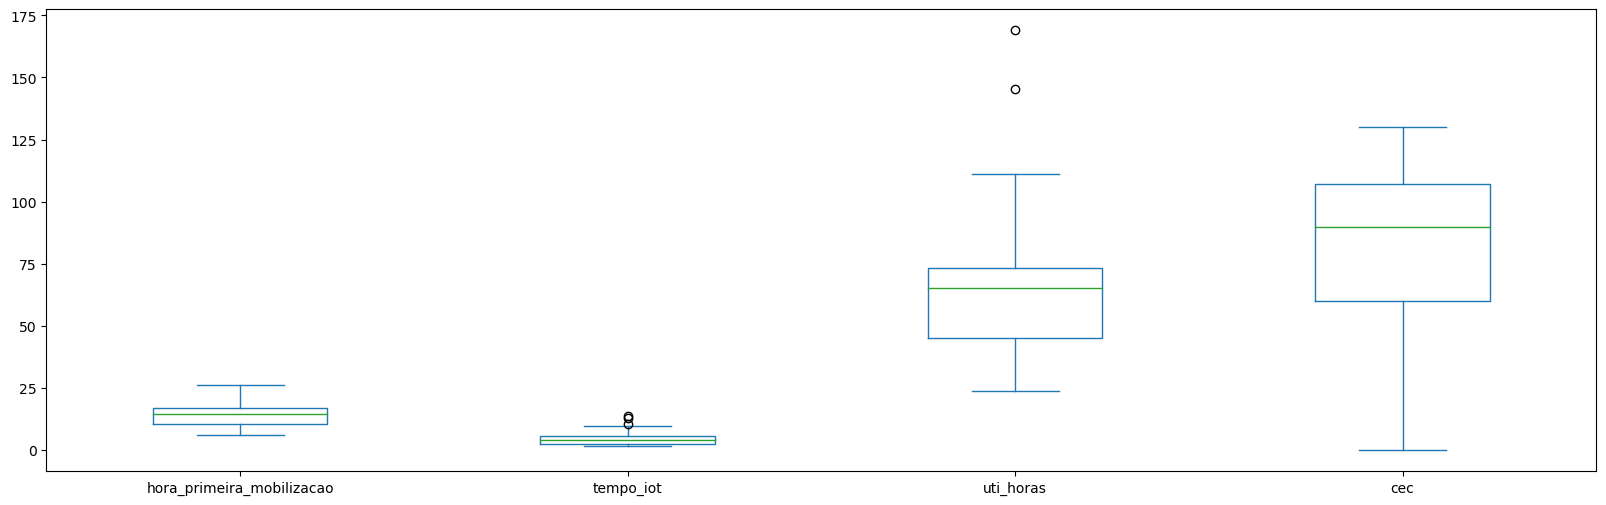

In [13]:
# distribuição das variáveis e checando outliers por gráfico de box plot
dados2[['hora_primeira_mobilizacao', 'tempo_iot', 'uti_horas', 'cec']].plot.box(figsize=(20,6));

In [14]:
# criando as variáveis X e Y para o modelo de regressão linear multipla

#Variáveis independentes
X = dados2.drop(['hora_primeira_mobilizacao'],axis=1)

#Variável dependentes
y = dados2['hora_primeira_mobilizacao']

In [15]:
# Criando o modelo linear e seu output
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Sumário do modelo                                  
=====================================================================================
Dep. Variable:     hora_primeira_mobilizacao   R-squared:                       0.327
Model:                                   OLS   Adj. R-squared:                  0.273
Method:                        Least Squares   F-statistic:                     6.000
Date:                       Wed, 16 Aug 2023   Prob (F-statistic):            0.00194
Time:                               21:49:40   Log-Likelihood:                -108.48
No. Observations:                         41   AIC:                             225.0
Df Residuals:                             37   BIC:                             231.8
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7819      1.836     10.232      0.000      15.063      22.501
tempo_iot     -0.7319      0.194     -3.774      0.001      -1.125      -0.339
uti_horas      0.0135      0.020      0.669      0.507      -0.027       0.054
cec           -0.0236      0.017     -1.367      0.180      -0.059       0.011
==============================================================================
Omnibus:                        4.343   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.503
Skew:                           0.363   Prob(JB):                        0.174
Kurtosis:                       4.234   Cond. No.                         364.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# resíduos do modelo
modelo1.resid

0     -3.707414
1     -0.562132
2     -1.090978
3     -1.378809
4     -2.343180
5     -2.567732
6      2.154959
7      3.591716
8      1.580769
9     -7.688861
10    -0.475660
11     5.073339
12     0.686798
13     0.546577
14     1.256062
15    -3.438284
16     2.715083
17    -1.293331
18     1.674175
19     0.034917
20    -1.365754
21    -3.843465
22     1.279306
23     3.064976
24     2.299597
25     1.592341
26    -3.154501
27    -4.310426
28    -1.277472
29    -5.179434
30     0.881992
31    -1.441891
32     5.733459
33     0.927614
34     1.239514
35     0.882918
36    -2.285622
37    -6.642606
38     2.890220
39     3.077462
40    10.863757
dtype: float64

C:\Users\gobbi\AppData\Local\Temp\ipykernel_9744\2899336038.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos1,ax=ax[0][1])


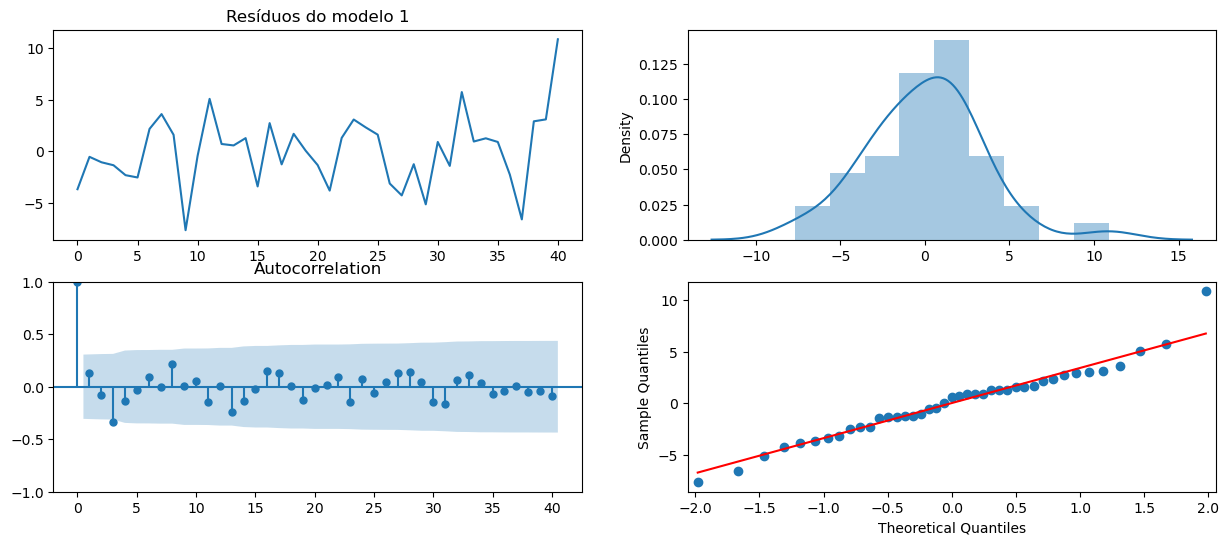

In [17]:
# testando a normalidade dos resíduos do modelo, para verificar se segue com regressão linear
residuos1 = modelo1.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

In [18]:
stats.shapiro(modelo1.resid)

ShapiroResult(statistic=0.9715689420700073, pvalue=0.387389212846756)

In [19]:
#steppwise para verificar quais as variáveis independentes são significativas e ficam para o modelo final

backselect = step_reg.backward_regression(X, y, 0.05,verbose=False)

backselect 

['tempo_iot']

In [20]:
X2 = dados2.drop(['hora_primeira_mobilizacao', 'cec', 'uti_horas'],axis=1)

In [21]:
modelo2 = (sm.OLS(y,sm.add_constant(X2)).fit())
modelo2.summary(title='Sumário do modelo stepwise')

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Sumário do modelo stepwise                             
=====================================================================================
Dep. Variable:     hora_primeira_mobilizacao   R-squared:                       0.291
Model:                                   OLS   Adj. R-squared:                  0.273
Method:                        Least Squares   F-statistic:                     16.05
Date:                       Wed, 16 Aug 2023   Prob (F-statistic):           0.000269
Time:                               21:49:42   Log-Likelihood:                -109.54
No. Observations:                         41   AIC:                             223.1
Df Residuals:                             39   BIC:                             226.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8779      1.085     16.481      0.000      15.684      20.072
tempo_iot     -0.7629      0.190     -4.006      0.000      -1.148      -0.378
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.386
Skew:                           0.191   Prob(JB):                        0.825
Kurtosis:                       3.282   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

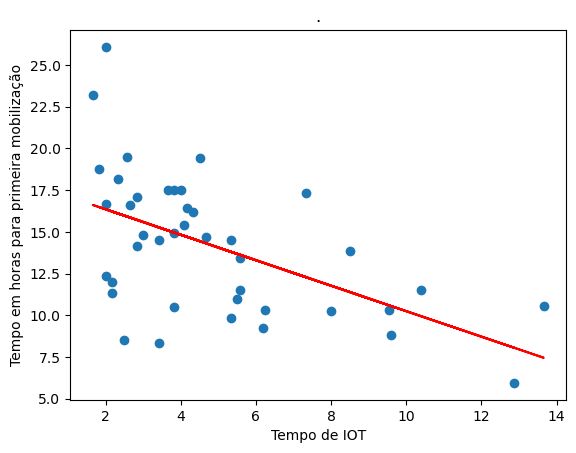

In [22]:
plt.scatter(dados2.tempo_iot,dados2.hora_primeira_mobilizacao)   
plt.plot(X2, modelo2.predict(), color = "red")
plt.title('.')
plt.xlabel('Tempo de IOT')
plt.ylabel('Tempo em horas para primeira mobilização')
plt.grid(False)
plt.show()

<Axes: xlabel='tempo_iot', ylabel='hora_primeira_mobilizacao'>

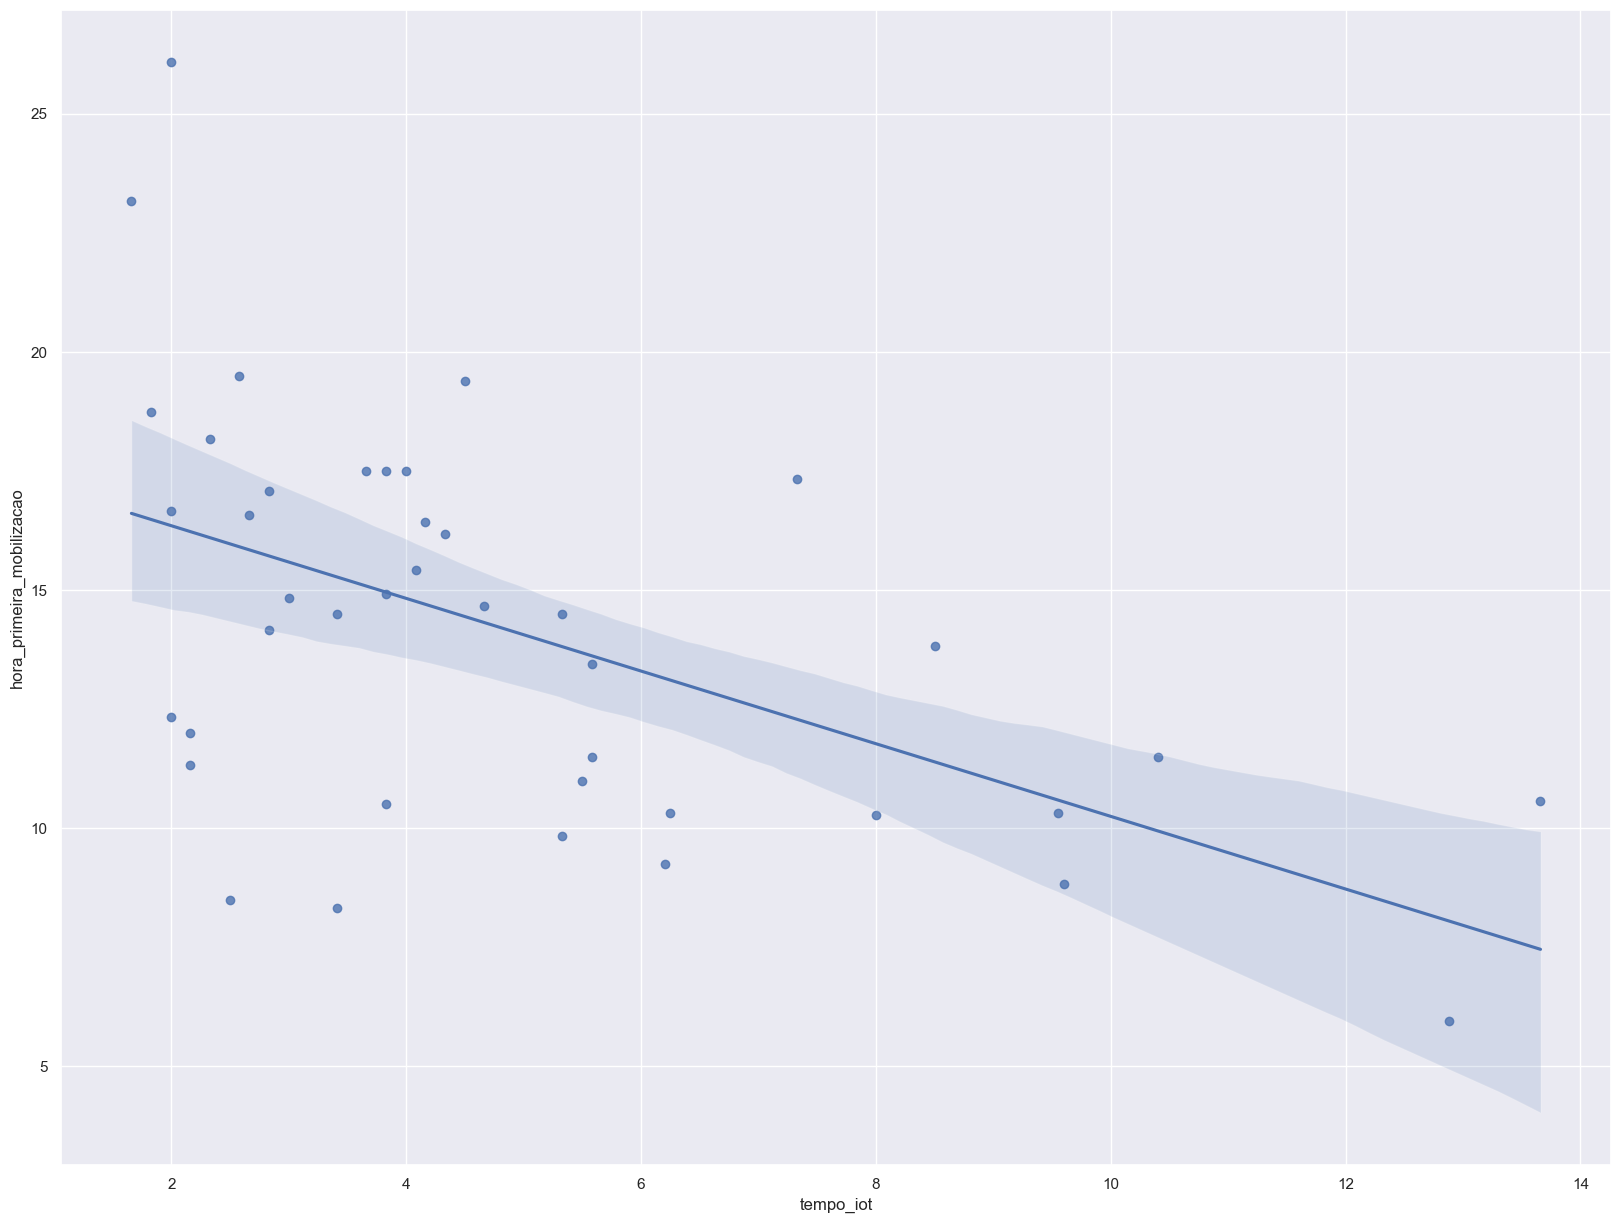

In [23]:
sns.set_theme()
plt.figure(figsize = (20, 15))
sns.regplot(x = 'tempo_iot', y = 'hora_primeira_mobilizacao', data = dados2)